 ## MSD

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


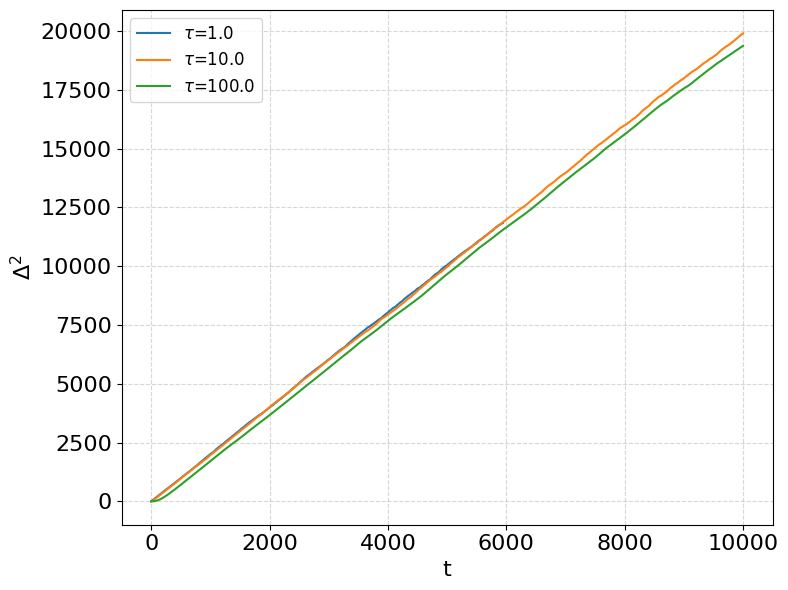

In [16]:
import numpy as np
import matplotlib.pyplot as plt

taus = [1.0, 10.0,100.0]

plt.figure(figsize=(8,6))

# Different markers for visual clarity
markers = ['o', 's', '^']

for tau, marker in zip(taus, markers): 
    filename = f"MSD_Taus_{tau:.1f}.txt"
    data = np.loadtxt(filename)
    t = data[:, 0]
    msd = data[:, 1]
    
    # --- Plot with points only ---
    plt.plot(
        t, msd,       # shape of points
        linestyle='-',     # no connecting lines
        label=rf'$\tau$={tau:.1f}'
    )

plt.xlabel('t', fontsize=16)
plt.ylabel(r'$\Delta^2$', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()


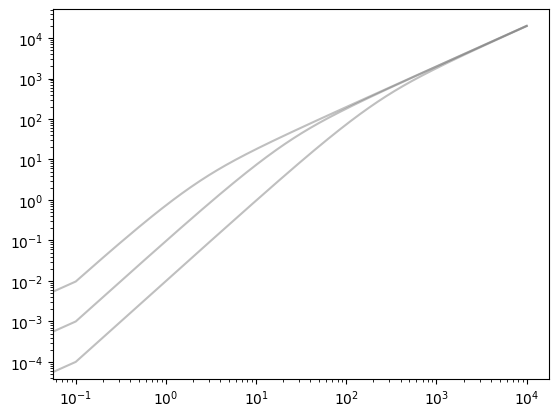

In [17]:
# Parámetros de ejemplo para la teoría
D = 1.0  # coeficiente de difusión
for tau, marker in zip(taus, markers):
    # ya cargas t y msd
    # Teoría: MSD(t) = 2 D tau ( t/tau + exp(-t/tau) - 1 )
    MSD_theory = 2 * D * tau * ( t/tau + np.exp(-t/tau) - 1 )
    plt.loglog(t, MSD_theory, linestyle='-', color='grey', alpha=0.5, label=f'Theory tau={tau}')


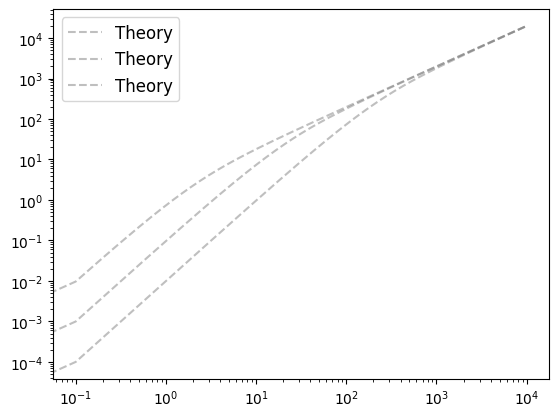

In [18]:


# Parámetros de ejemplo para la teoría
D = 1.0  # coeficiente de difusión
for tau, marker in zip(taus, markers):
    # ya cargas t y msd
    # Teoría: MSD(t) = 2 D tau ( t/tau + exp(-t/tau) - 1 )
    MSD_theory = 2 * D * tau * ( t/tau + np.exp(-t/tau) - 1 )
    plt.loglog(t, MSD_theory, linestyle='--', color='grey', alpha=0.5, label=f'Theory')
plt.legend(fontsize=12)
plt.show()


PALETA

In [19]:
import matplotlib.cm as cm

colors = cm.viridis(np.linspace(0, 1, len(taus)))

$\tau$ representes the time needed to relax. In practice 1, we had $\Delta^2=2Dt$, lets compare it

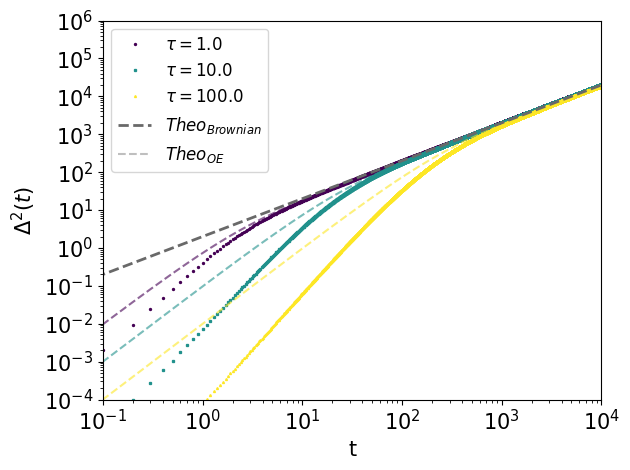

In [20]:
import numpy as np
import matplotlib.pyplot as plt

for tau, marker, color in zip(taus, markers, colors):
    # Archivo correspondiente a cada tau
    filename = f"MSD_Taus_{tau:.1f}.txt"
    data = np.loadtxt(filename)
    t = data[:, 0]
    msd = data[:, 1]

    # --- Simulación: puntos ---
    plt.loglog(t, msd, marker=marker, markersize=1.4, linestyle='None', color=color, label=rf'$\tau={tau:.1f}$')

    # --- Teórica tipo P2: línea discontinua con mismo color ---
    MSD_theory_P2 = 2 * D * tau * (t/tau + np.exp(-t/tau) - 1)
    plt.loglog(t, MSD_theory_P2, linestyle='--', color=color, alpha=0.6)

# --- Teórica tipo P1: línea discontinua más oscura ---
MSD_theory_P1 = 2 * D * t
plt.loglog(t, MSD_theory_P1, linestyle='--', color='dimgray', lw=2, label='$Theo_{Brownian}$')

# --- Leyenda adicional para P2 ---
plt.loglog([], [], linestyle='--', color='grey', alpha=0.5, label='$Theo_{OE}$')

# --- Estilo del gráfico ---
plt.xlabel('t', fontsize=15)
plt.ylabel('$\Delta^2(t)$', fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0.1, 10000)
plt.ylim(0.0001, 1000000)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("figures/MSD.png",dpi=300)
plt.show()

Para $tau$ cercana a cero, el resultado se aproxima al obtenido en el movimiento browniano con ruido blanco, ya que el tiempo caracteristico es muy pequeño

# Trayectories 

In [21]:
taus= [1.0, 10.0,100.0]
L = 100.0
n_particulas = 10

In [23]:
import numpy as np
import matplotlib.pyplot as plt
def mostrar_trayectorias(nombre_archivo, tau, n_particulas):
    data = np.loadtxt(nombre_archivo)
    tiempos = np.arange(data.shape[0])
    
    posiciones = data[:, 1:] if data.shape[1] > 1 else data
    
    plt.figure(figsize=(8, 5))
    for i in range(min(n_particulas, posiciones.shape[1])):
        plt.plot(tiempos, posiciones[:, i], lw=1)
    
    plt.xlabel("Tiempo")
    plt.ylabel("Posición")
    plt.title(f"Trayectorias individuales (τ = {tau})")
    plt.ylim(-L/2, L/2)
    plt.show()

for tau in taus:
    nombre_archivo = f"trajectories_tau_{tau:.1f}.txt"
    mostrar_trayectorias(nombre_archivo, tau,n_particulas)

MemoryError: 

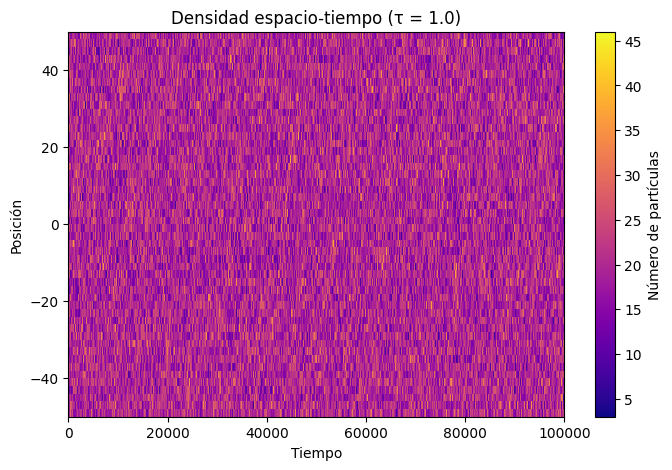

In [ ]:
def densidad_espacio_tiempo(nombre_archivo, tau, bins=50):
    data = np.loadtxt(nombre_archivo)
    posiciones = data[:, 1:] if data.shape[1] > 1 else data
    tiempos = np.arange(data.shape[0])

    plt.figure(figsize=(8, 5))
    plt.hist2d(np.tile(tiempos, posiciones.shape[1]), posiciones.flatten(),
               bins=[len(tiempos), bins], cmap='plasma')
    plt.colorbar(label='Número de partículas')
    plt.xlabel('Tiempo')
    plt.ylabel('Posición')
    plt.title(f"Densidad espacio-tiempo (τ = {tau})")
    plt.show()

tau=1.0
nombre_archivo = f"trajectories_tau_{tau:.1f}.txt"
densidad_espacio_tiempo(nombre_archivo, tau)


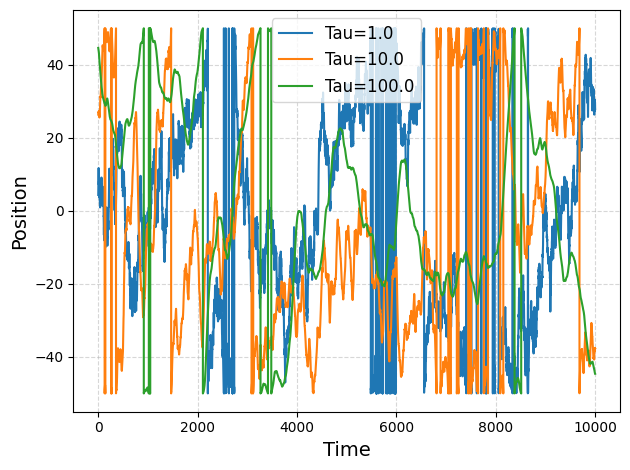

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

taus = [1.0, 10.0,100.0]

for tau in taus:
    data = np.loadtxt(f"trajectories_tau_{tau:.1f}.txt")
    t = np.arange(data.shape[0])*0.1 # delta t = 0.1
    plt.plot(t, data[:,0], label=f'Tau={tau}') 

plt.xlabel('Time', fontsize=14)
plt.ylabel('Position', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()  


# Correlation

La correlacion, se calcula como: 
$\frac{1}{N} \sum <\xi_i(t)\xi_i(t´)>$

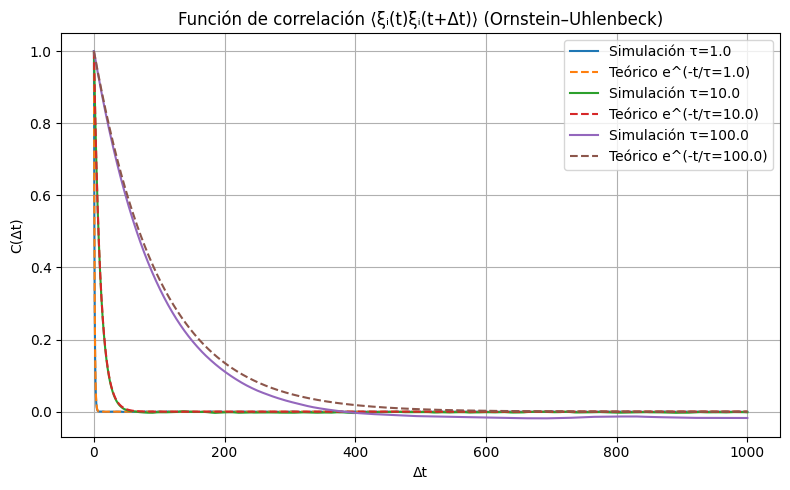

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve

def autocorr_fft(x):
    """Autocorrelación normalizada con FFT (rápida)."""
    x = x - np.mean(x)
    corr = fftconvolve(x, x[::-1], mode='full')
    corr = corr[corr.size // 2:]
    return corr / corr[0]

def correlacion_xi(filename, dt=0.1):
    """
    Calcula C(Δt) = (1/N) Σ_i <ξ_i(t) ξ_i(t+Δt)> para un fichero con:
    xi_1(t), xi_2(t), ..., xi_N(t)
    (sin columna de tiempo)
    """
    # Cargar matriz de datos: filas = tiempo, columnas = partículas
    xi = np.loadtxt(filename)
    
    num_steps, N = xi.shape
    
    # Vector de tiempos generado a partir de Δt
    t = np.arange(num_steps) * dt
    
    # Calcular correlación promedio sobre partículas
    corr_total = np.zeros(num_steps)
    for i in range(N):
        corr_total += autocorr_fft(xi[:, i])
    
    corr_prom = corr_total / N
    delta_t = t - t[0]
    return delta_t, corr_prom


# === USO DEL CÓDIGO ===
taus = [1.0, 10.0, 100.0]  # taus simuladas
dt = 0.1
t_max = 1e3  # máximo tiempo a plotear

plt.figure(figsize=(8,5))

for tau in taus:
    filename = f"xi_tau_{tau:.1f}.txt"
    delta_t, C = correlacion_xi(filename, dt=dt)
    
    # Recortar hasta t_max
    mask = delta_t <= t_max
    delta_t_cut = delta_t[mask]
    C_cut = C[mask]
    
    plt.plot(delta_t_cut, C_cut, label=f"Simulación τ={tau}")
    plt.plot(delta_t_cut, np.exp(-delta_t_cut / tau), '--', label=f"Teórico e^(-t/τ={tau})")

plt.xlabel("Δt")
plt.ylabel("C(Δt)")
plt.title("Función de correlación ⟨ξᵢ(t)ξᵢ(t+Δt)⟩ (Ornstein–Uhlenbeck)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



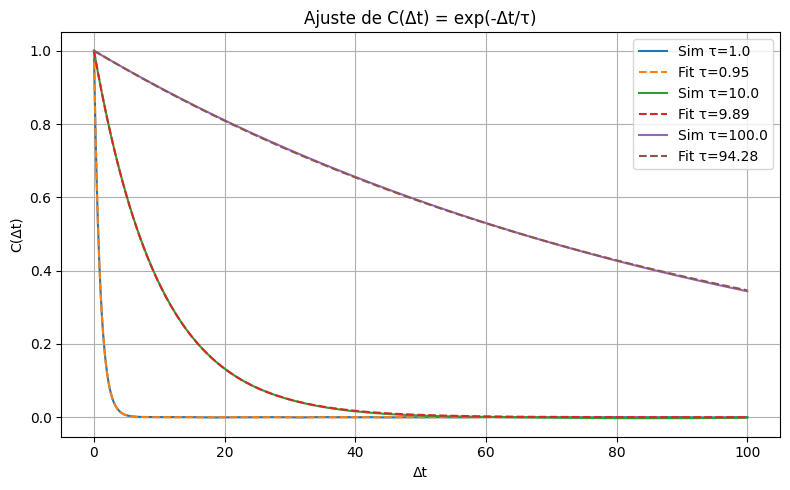

 τ_sim     τ_fit ± err
-------------------------
   1.0      0.949 ± 0.000
  10.0      9.892 ± 0.002
 100.0     94.275 ± 0.013


In [ ]:
from scipy.optimize import curve_fit

def corr_ou_norm(delta_t, tau):
    return np.exp(-delta_t / tau)


def fit_tau(delta_t, C, t_max_fit=None):
    if t_max_fit is not None:
        mask = delta_t <= t_max_fit
        delta_t = delta_t[mask]
        C = C[mask]

    # quitar valores no físicos
    mask = (C > 0) & np.isfinite(C)
    delta_t = delta_t[mask]
    C = C[mask]

    # estimación inicial τ₀
    idx = np.where(C < 1/np.e)[0]
    tau0 = delta_t[idx[0]] if len(idx) > 0 else delta_t[-1] / 5

    popt, pcov = curve_fit(
        corr_ou_norm,
        delta_t,
        C,
        p0=[tau0],
        bounds=(0, np.inf)
    )

    tau_fit = popt[0]
    err_tau = np.sqrt(pcov[0,0])
    return tau_fit, err_tau

taus = [1.0, 10.0, 100.0]
dt = 0.1
t_max_fit = 100
t_max_plot = 100

resultados = []

plt.figure(figsize=(8,5))

for tau_sim in taus:
    filename = f"xi_tau_{tau_sim:.1f}.txt"

    delta_t, C = correlacion_xi(filename, dt=dt)

    tau_fit, err_tau = fit_tau(delta_t, C, t_max_fit=t_max_fit)
    resultados.append((tau_sim, tau_fit, err_tau))

    mask = delta_t <= t_max_plot
    plt.plot(delta_t[mask], C[mask], label=f"$\tau_{sim}$={tau_sim}")
    plt.plot(
        delta_t[mask],
        corr_ou_norm(delta_t[mask], tau_fit),
        '--',
        label=f"Fit τ={tau_fit:.2f}"
    )

plt.xlabel("Δt")
plt.ylabel("C(Δt)")
plt.title("Ajuste de C(Δt) = exp(-Δt/τ)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


print(" τ_sim     τ_fit ± err")
print("-------------------------")
for tau_sim, tau_fit, err_tau in resultados:
    print(f"{tau_sim:6.1f}   {tau_fit:8.3f} ± {err_tau:.3f}")



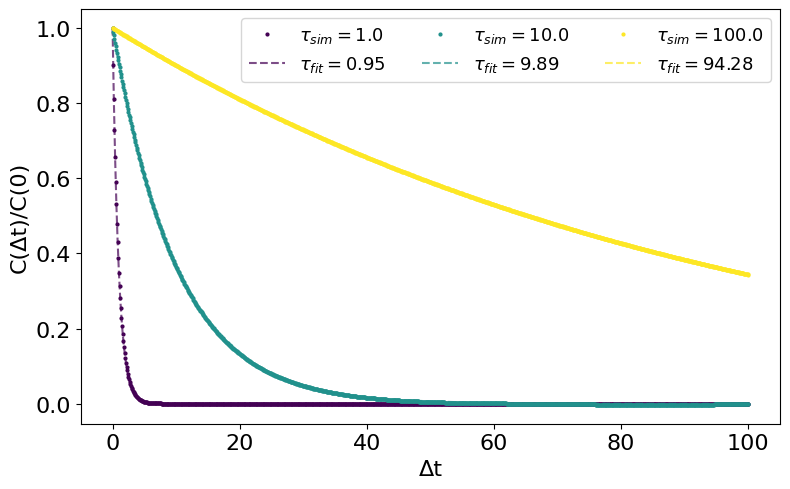

 τ_sim     τ_fit ± err
-------------------------
   1.0      0.949 ± 0.000
  10.0      9.892 ± 0.002
 100.0     94.275 ± 0.013


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.cm as cm

# ---------- MODELO ----------
def corr_ou_norm(delta_t, tau):
    return np.exp(-delta_t / tau)

def fit_tau(delta_t, C, t_max_fit=None):
    if t_max_fit is not None:
        mask = delta_t <= t_max_fit
        delta_t = delta_t[mask]
        C = C[mask]

    mask = (C > 0) & np.isfinite(C)
    delta_t = delta_t[mask]
    C = C[mask]

    idx = np.where(C < 1/np.e)[0]
    tau0 = delta_t[idx[0]] if len(idx) > 0 else delta_t[-1] / 5

    popt, pcov = curve_fit(
        corr_ou_norm,
        delta_t,
        C,
        p0=[tau0],
        bounds=(0, np.inf)
    )

    tau_fit = popt[0]
    err_tau = np.sqrt(pcov[0, 0])
    return tau_fit, err_tau


# ---------- PARÁMETROS ----------
taus = [1.0, 10.0, 100.0]
dt = 0.1
t_max_fit = 100
t_max_plot = 100

colors = cm.viridis(np.linspace(0, 1, len(taus)))
marker = 'o'

resultados = []

plt.figure(figsize=(8,5))

# ---------- LOOP PRINCIPAL ----------
for tau_sim, color in zip(taus, colors):
    filename = f"xi_tau_{tau_sim:.1f}.txt"

    delta_t, C = correlacion_xi(filename, dt=dt)

    tau_fit, err_tau = fit_tau(delta_t, C, t_max_fit)
    resultados.append((tau_sim, tau_fit, err_tau))

    mask = delta_t <= t_max_plot

    # --- Simulación: puntos ---
    plt.plot(
        delta_t[mask],
        C[mask],
        marker=marker,
        linestyle='None',
        markersize=2,
        color=color,
        label=rf'$\tau_{{sim}}={tau_sim:.1f}$'
    )

    # --- Fit: línea discontinua, mismo color ---
    plt.plot(
        delta_t[mask],
        corr_ou_norm(delta_t[mask], tau_fit),
        linestyle='--',
        color=color,
        alpha=0.7,
        label=rf'$\tau_{{fit}}={tau_fit:.2f}$'
    )

# ---------- ESTÉTICA ----------
plt.xlabel("Δt", fontsize=16)
plt.ylabel("C(Δt)/C(0)", fontsize=16)


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13, ncol=3)
plt.tight_layout()
plt.show()

# ---------- TABLA ----------
print(" τ_sim     τ_fit ± err")
print("-------------------------")
for tau_sim, tau_fit, err_tau in resultados:
    print(f"{tau_sim:6.1f}   {tau_fit:8.3f} ± {err_tau:.3f}")


Para valores de $\tau$ pequeños ajusta bien a la curva teórica pero cuando el tiempo característico crece el ajuste no es tan bueno.

# External force

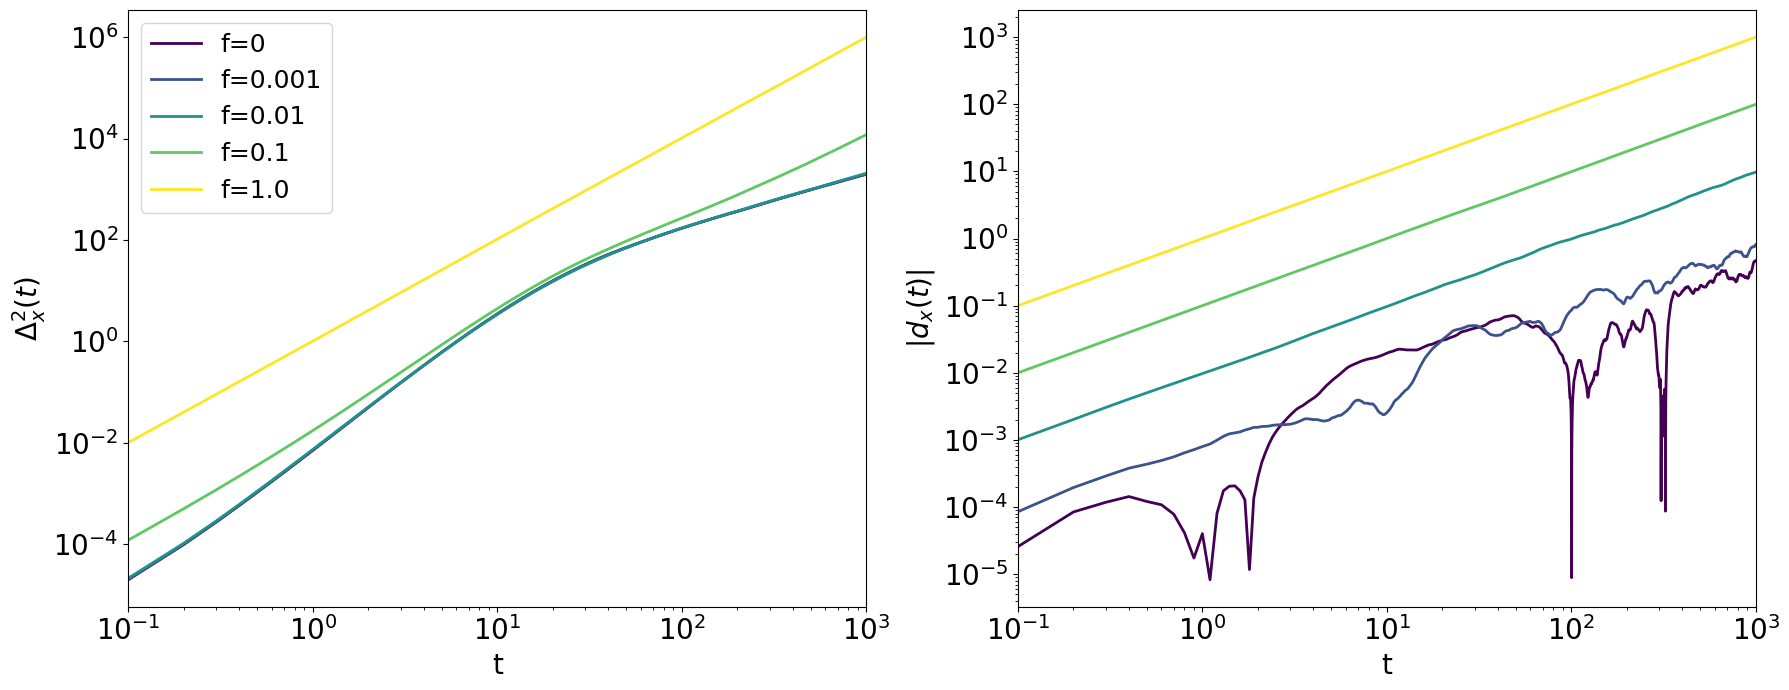

f = 0.001,  dx(t*) = 6.395e-01,  dx/f = 6.395e+02
f = 0.01,  dx(t*) = 7.864e+00,  dx/f = 7.864e+02
f = 0.1,  dx(t*) = 7.983e+01,  dx/f = 7.983e+02
f = 1,  dx(t*) = 8.001e+02,  dx/f = 8.001e+02


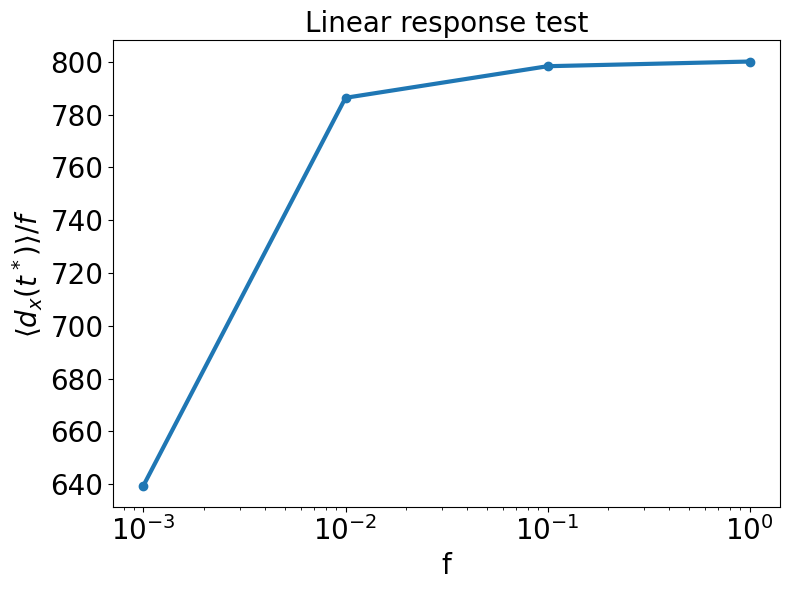

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# === Parámetros ===
forces = [0, 0.001, 0.01, 0.1, 1.0]
t_ref_fraction = 0.8  # usar el 80% del tiempo máximo para régimen estacionario

# === Paleta de colores ===
colors = cm.viridis(np.linspace(0, 1, len(forces)))

# === MSD y DX plot en la misma fila con mayor tamaño ===
fig, axes = plt.subplots(1, 2, figsize=(18, 7))  # figura más grande

# --- MSD (ahora con leyenda) ---
for f, c in zip(forces, colors):
    data = np.loadtxt(f"MSD_x_f_{f:.3f}.txt")
    t, msd = data[:, 0], data[:, 1]
    axes[0].loglog(t, msd, label=f"f={f}", color=c, lw=2)
axes[0].set_xlabel("t", fontsize=20)
axes[0].set_ylabel(r"$\Delta_x^2(t)$", fontsize=20)
axes[0].set_xlim(0.1, 1000)
axes[0].tick_params(axis='both', labelsize=20)
axes[0].legend(fontsize=18)


# --- DX (sin leyenda) ---
dx_values = {}
for f, c in zip(forces, colors):
    data = np.loadtxt(f"DX_f_{f:.3f}.txt")
    t, dx = data[:, 0], data[:, 1]
    dx_values[f] = (t, dx)
    axes[1].loglog(t, np.abs(dx), color=c, lw=2)
axes[1].set_xlabel("t", fontsize=20)
axes[1].set_ylabel(r"$|d_x(t)|$", fontsize=20)
axes[1].set_xlim(0.1, 1000)
axes[1].tick_params(axis='both', labelsize=20)

plt.tight_layout()
plt.savefig("figures/forces.png", dpi=300)
plt.show()

# === Análisis del régimen lineal ===
ratios = []
f_nonzero = [f for f in forces if f > 0]

for f in f_nonzero:
    t, dx = dx_values[f]
    idx_ref = int(len(t) * t_ref_fraction)  # punto cercano al final
    dx_ref = dx[idx_ref]
    ratio = dx_ref / f
    ratios.append(ratio)
    print(f"f = {f:.4g},  dx(t*) = {dx_ref:.3e},  dx/f = {ratio:.3e}")

# === Gráfico de régimen lineal ===
plt.figure(figsize=(8, 6))  # figura más grande
plt.plot(f_nonzero, ratios, "o-", lw=3)
plt.xscale("log")
plt.xlabel("f", fontsize=20)
plt.ylabel(r"$\langle d_x(t^*) \rangle / f$", fontsize=20)
plt.title("Linear response test", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()


The system is in lineal regim ewhen $<d_x(t)>$ increases linearly with f. Therefore, when $f>0.01$ we can consider that we are in the lineal regime. (At forces suficiently big)

## D and $\mu$ versus $\tau$

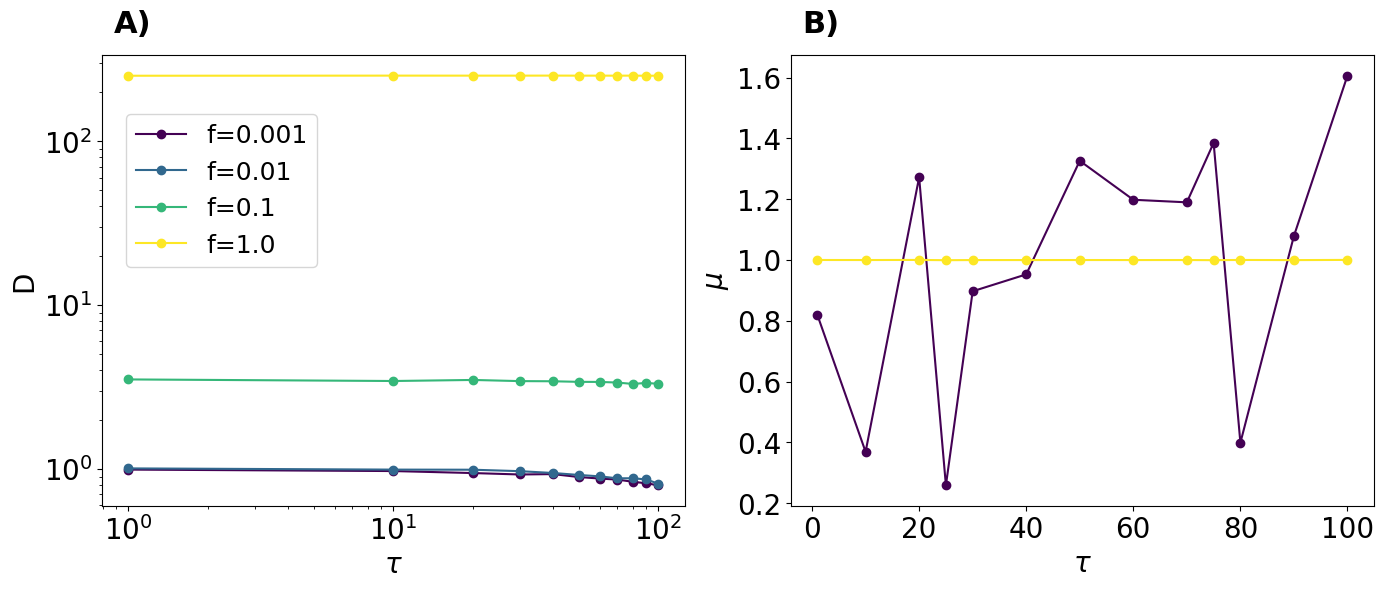

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ============================
# LEER DATOS D
# ============================
taus_D, forces_D, D_values = [], [], []

with open("D_vs_tau_new.txt", "r") as f:
    for line in f:
        if line.strip() == "":
            continue
        tau, ff, D = line.split()
        taus_D.append(float(tau))
        forces_D.append(float(ff))
        D_values.append(float(D))

# ============================
# LEER DATOS MU
# ============================
taus_mu, forces_mu, mu_values = [], [], []

with open("mu_vs_tau.txt", "r") as f:
    for line in f:
        if line.strip() == "":
            continue
        tau, ff, mu = line.split()
        taus_mu.append(float(tau))
        forces_mu.append(float(ff))
        mu_values.append(float(mu))

# Fuerzas únicas (mismas para ambos)
forces_unique = sorted(list(set(forces_D) | set(forces_mu)))

# Paleta de colores (tu paleta)
colors = cm.viridis(np.linspace(0, 1, len(forces_unique)))


# ============================
# FIGURA CON DOS SUBPLOTS
# ============================
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.subplots_adjust(wspace=0.4)

# ============================
# --- A) D vs tau ---
# ============================
ax = axs[0]

for idx, f in enumerate(forces_unique):
    tau_f = [taus_D[i] for i in range(len(taus_D)) if forces_D[i] == f]
    D_f   = [D_values[i] for i in range(len(D_values)) if forces_D[i] == f]
    
    ax.plot(tau_f, D_f, marker="o", label=f"f={f}", color=colors[idx])

ax.set_xlabel(r"$\tau$", fontsize=20)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel("D", fontsize=20)
ax.tick_params(axis='both', labelsize=20)
ax.legend(   fontsize=18,
    loc="center left",
    bbox_to_anchor=(0.02, 0.7) )
ax.text(0.02, 1.05, "A)", transform=ax.transAxes, fontsize=22, fontweight="bold")

# ============================
# --- B) μ vs tau ---
# ============================
ax = axs[1]

for idx, f in enumerate(forces_unique):
    tau_f = [taus_mu[i] for i in range(len(taus_mu)) if forces_mu[i] == f]
    mu_f  = [mu_values[i] for i in range(len(mu_values)) if forces_mu[i] == f]
    
    ax.plot(tau_f, mu_f, marker="o", label=f"f={f}", color=colors[idx])

ax.set_xlabel(r"$\tau$", fontsize=20)
ax.set_ylabel(r"$\mu$", fontsize=20)
ax.tick_params(axis='both', labelsize=20)
ax.text(0.02, 1.05, "B)", transform=ax.transAxes, fontsize=22, fontweight="bold")

plt.tight_layout()
plt.savefig("figures/D_mu.svg")
plt.show()
